In [1]:
#!pip install wes

In [79]:
import wes

(<Figure size 1200x1200 with 18 Axes>,
 array([[<Axes: title={'center': 'BottleRocket1'}>,
         <Axes: title={'center': 'BottleRocket2'}>,
         <Axes: title={'center': 'Rushmore1'}>,
         <Axes: title={'center': 'Royal1'}>,
         <Axes: title={'center': 'Royal2'}>,
         <Axes: title={'center': 'Zissou1'}>],
        [<Axes: title={'center': 'Darjeeling1'}>,
         <Axes: title={'center': 'Darjeeling2'}>,
         <Axes: title={'center': 'Chevalier1'}>,
         <Axes: title={'center': 'FantasticFox1'}>,
         <Axes: title={'center': 'Moonrise1'}>,
         <Axes: title={'center': 'Moonrise2'}>],
        [<Axes: title={'center': 'Moonrise3'}>,
         <Axes: title={'center': 'Cavalcanti1'}>,
         <Axes: title={'center': 'GrandBudapest1'}>,
         <Axes: title={'center': 'GrandBudapest2'}>,
         <Axes: title={'center': 'IsleofDogs1'}>,
         <Axes: title={'center': 'IsleofDogs2'}>]], dtype=object))

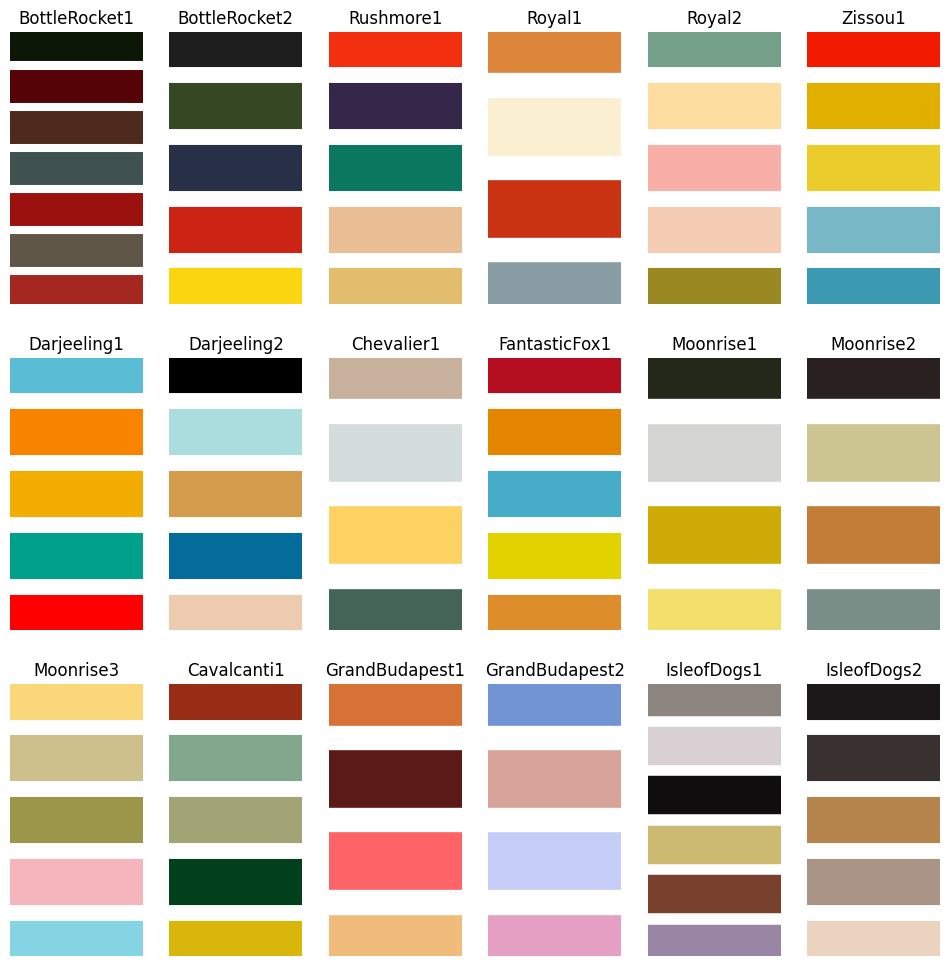

In [80]:
wes.available()

In [85]:
wes_dict = {"BottleRocket1":["#A42820", "#5F5647", "#9B110E", "#3F5151", "#4E2A1E", "#550307", "#0C1707"],
"BottleRocket2":["#FAD510", "#CB2314", "#273046", "#354823", "#1E1E1E"],
"Rushmore1":["#E1BD6D", "#EABE94", "#0B775E", "#35274A","#F2300F"],
"Royal1":["#899DA4", "#C93312", "#FAEFD1", "#DC863B"],
"Royal2":["#9A8822", "#F5CDB4", "#F8AFA8", "#FDDDA0", "#74A089"],
"Zissou1":["#3B9AB2", "#78B7C5", "#EBCC2A", "#E1AF00", "#F21A00"],
"Darjeeling1":["#FF0000", "#00A08A", "#F2AD00", "#F98400", "#5BBCD6"],
"Darjeeling2":["#ECCBAE", "#046C9A", "#D69C4E", "#ABDDDE", "#000000"],
"Chevalier1":["#446455", "#FDD262", "#D3DDDC", "#C7B19C"],
"FantasticFox1":["#DD8D29", "#E2D200", "#46ACC8", "#E58601", "#B40F20"],
"Moonrise1":["#F3DF6C", "#CEAB07", "#D5D5D3", "#24281A"],
"Moonrise2":["#798E87", "#C27D38", "#CCC591", "#29211F"],
"Moonrise3":["#85D4E3", "#F4B5BD", "#9C964A", "#CDC08C", "#FAD77B"],
"Cavalcanti1":["#D8B70A", "#02401B", "#A2A475", "#81A88D", "#972D15"],
"GrandBudapest1":["#F1BB7B", "#FD6467", "#5B1A18", "#D67236"],
"GrandBudapest2":["#E6A0C4", "#C6CDF7", "#D8A499", "#7294D4"],
"IsleofDogs1":["#9986A5", "#79402E", "#CCBA72", "#0F0D0E", "#D9D0D3", "#8D8680"],
"IsleofDogs2":["#EAD3BF", "#AA9486", "#B6854D", "#39312F", "#1C1718"]}

# Метод опорных векторов (SVM)

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt

## C = inf

In [2]:
iris = datasets.load_iris() # датасет с данными об ирисах, собранный Фишером, содержит три вида ирисов
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) 
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Обучим классификатор с большим штрафом за неправильную классификацию 

In [4]:
svm_clf = SVC(kernel="linear", C=1e9)
svm_clf.fit(X, y)

SVC(C=1000000000.0, kernel='linear')

In [6]:
# handson-ml course 
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    """Функция для отрисовки meshgrid SVM классификатора"""
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

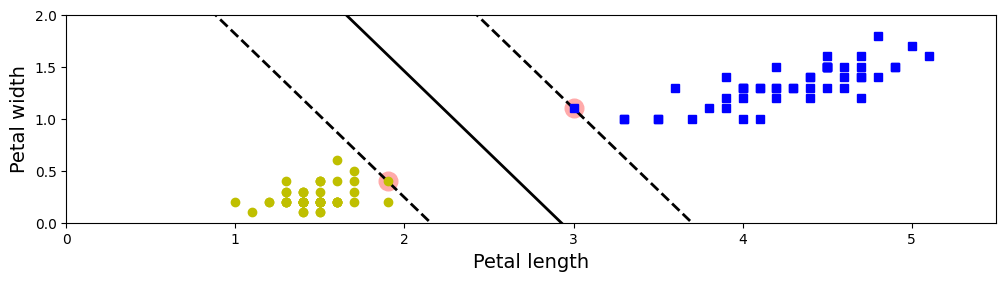

In [7]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Подпишите на графике опорные вектора. Что они собой представляют?

In [8]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

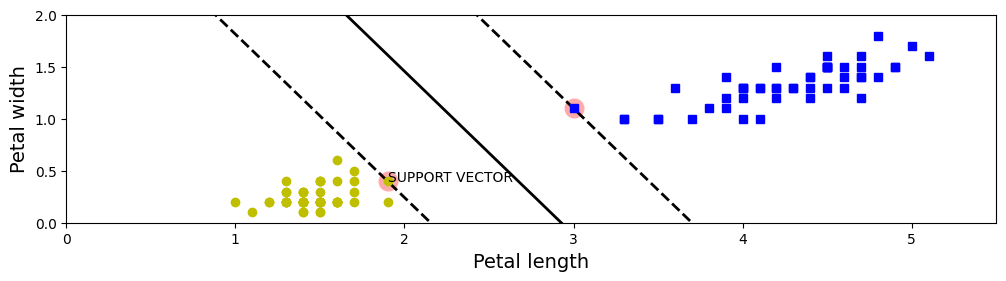

In [9]:
plt.figure(figsize=(12,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.text(1.9, 0.4, "SUPPORT VECTOR")
plt.show()

Добавим один выброс

In [10]:
svm_clf = SVC(kernel="linear", C=1e9) 
X_out = np.concatenate([X, np.array([3.2, 0.8]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf.fit(X_out, y_out)

SVC(C=1000000000.0, kernel='linear')

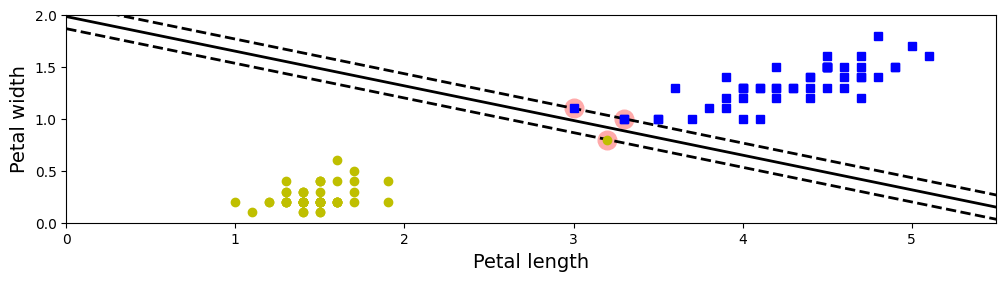

In [11]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Теперь добавим другой выброс

In [12]:
X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

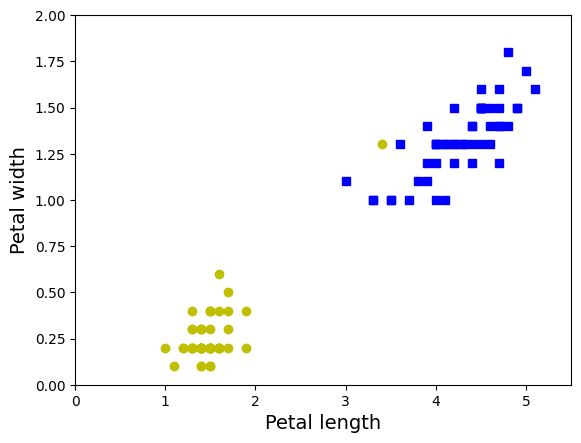

In [13]:
plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

In [42]:
svm_clf = SVC(kernel="linear", C=1e9) 
svm_clf.fit(X_out, y_out)

SVC(C=1000000000.0, kernel='linear')

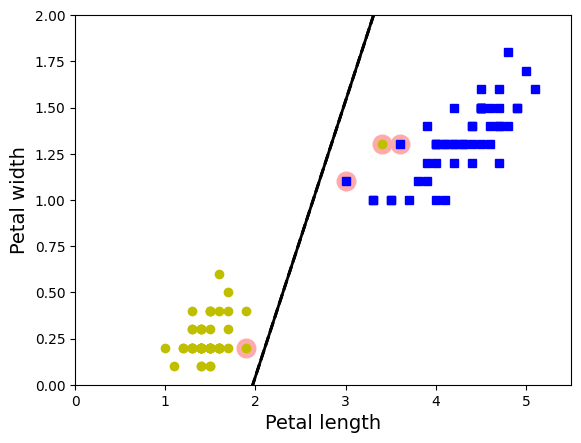

In [43]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()


## Чувствительность к масштабу признаков

[[ 1. 50.]
 [ 5. 60.]]
[[-1.50755672 -0.11547005]
 [ 0.90453403 -1.5011107 ]
 [ 0.90453403  0.34641016]]


(-2.0, 2.0, -2.0, 2.0)

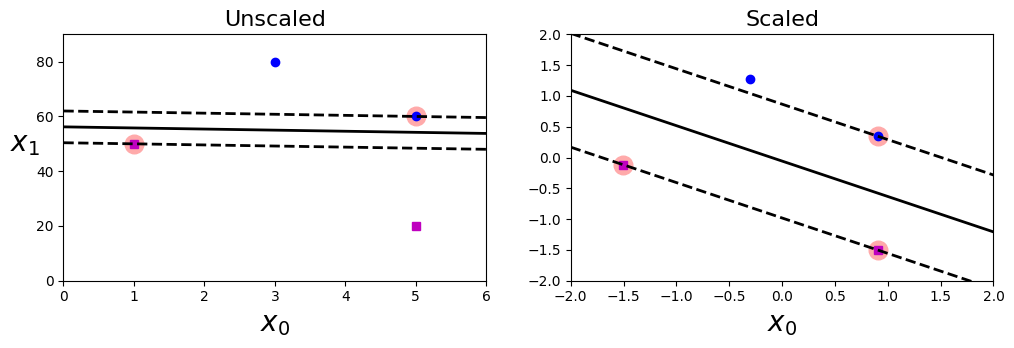

In [95]:
# handson-ml course 

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)
print(svm_clf.support_vectors_)
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)
print(svm_clf.support_vectors_)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)

plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

Какой еще алгоритм из разобранных ранее крайне чувствителен к масштабу признаков?

## Разные значения C

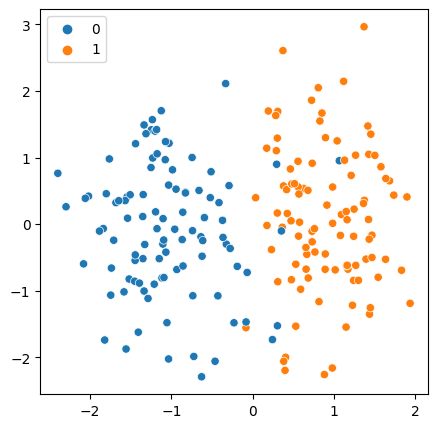

In [44]:
X, Y = datasets.make_classification(n_features=2, 
                                       n_redundant=0,
                                       n_informative=1,
                                       random_state=202, 
                                       n_clusters_per_class=1,
                                       flip_y=0, 
                                       n_samples=200)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(y=X[:, 1], x=X[:, 0], hue=Y)
plt.show()

Продемонстрируйте (при помощи графиков и используя датасет, сгенерированный в предыдущей ячейке), как меняется граница решений для kernel="linear" в зависимости от значения C

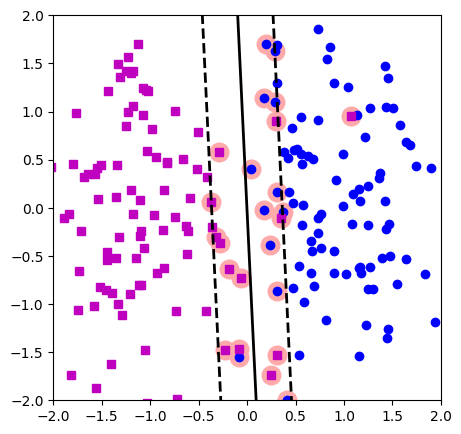

In [45]:
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, Y)
plt.figure(figsize=(5,5))
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bo")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "ms")
plt.axis([-2, 2, -2, 2])
plot_svc_decision_boundary(svm_clf, -2, 2)

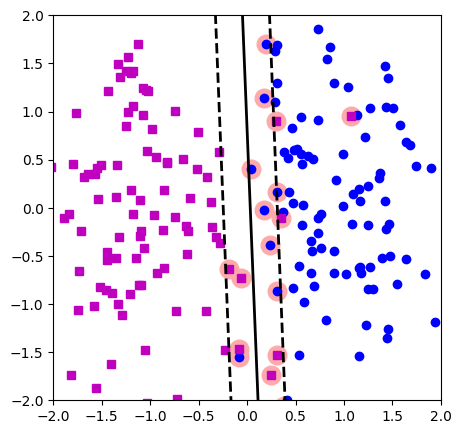

In [46]:
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(X, Y)
plt.figure(figsize=(5,5))
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bo")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "ms")
plt.axis([-2, 2, -2, 2])
plot_svc_decision_boundary(svm_clf, -2, 2)

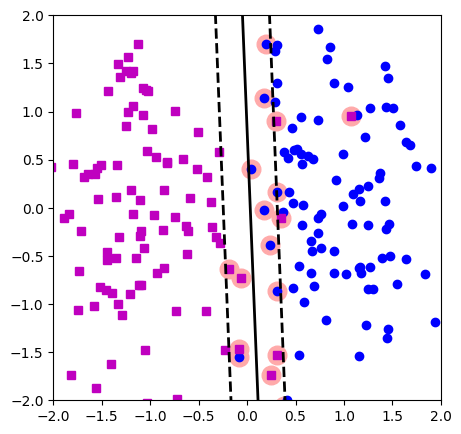

In [47]:
svm_clf = SVC(kernel="linear", C=1000)
svm_clf.fit(X, Y)
plt.figure(figsize=(5,5))
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bo")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "ms")
plt.axis([-2, 2, -2, 2])
plot_svc_decision_boundary(svm_clf, -2, 2)

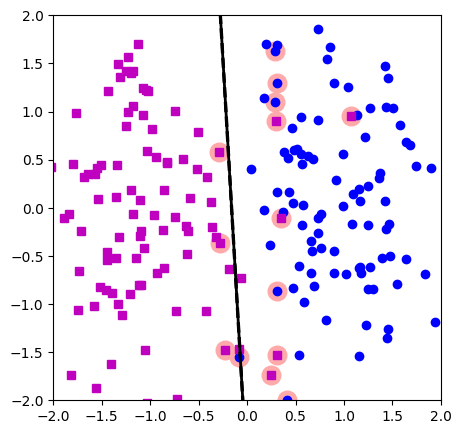

In [49]:
svm_clf = SVC(kernel="linear", C=1e9)
svm_clf.fit(X, Y)
plt.figure(figsize=(5,5))
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bo")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "ms")
plt.axis([-2, 2, -2, 2])
plot_svc_decision_boundary(svm_clf, -2, 2)

### Kernel trick 

Но в случае SVM за счет того, что функция решений выглядит следующим образом:

$$ decision_j = \sum_{i \in support\_vectors} c_i y_i <x_i, x_j> + b $$

можно сделать иначе. Для подсчета ее значения нам не нужно знать, как выглядят объекты в пространстве бОльшей размерности, а только уметь узнавать скалярное произведение между ними.

Оказывается, в некоторых случаях это можно делать, не переходя в это пространство, а вычисляя специальную **kernel function**

<img src="https://data.bioml.ru/htdocs/courses/bioml/TEMP/svm_kernel_trick.png" width="500">

Примеры ядер :

* $k(x_i, x_j) = (<x_i, x_j> + c)^d, с, d \in \mathbb{R}$ - полиномиальное ядро, считает расстояние между объектами в пространстве размерности d

* $k(x_i, x_j) = \frac{1}{z} e^{-\frac{h(x_i, x_j)^2}{h}}$ - радиальная базисная функция RBF





## Разные ядра

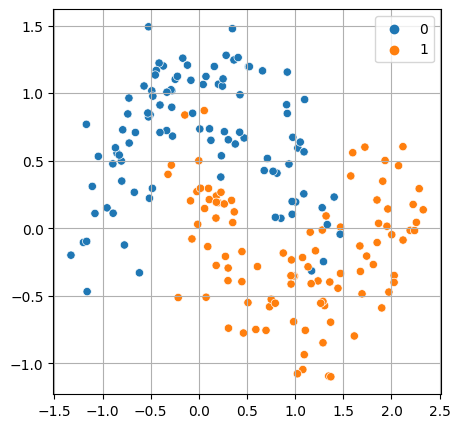

In [51]:
X, Y = datasets.make_moons(n_samples=200, 
                           noise=0.25,
                           random_state=200)
plt.figure(figsize=(5,5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y)
plt.grid(True, which='both')
plt.show()

In [55]:
# handson-ml course 

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 500)
    x1s = np.linspace(axes[2], axes[3], 500)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

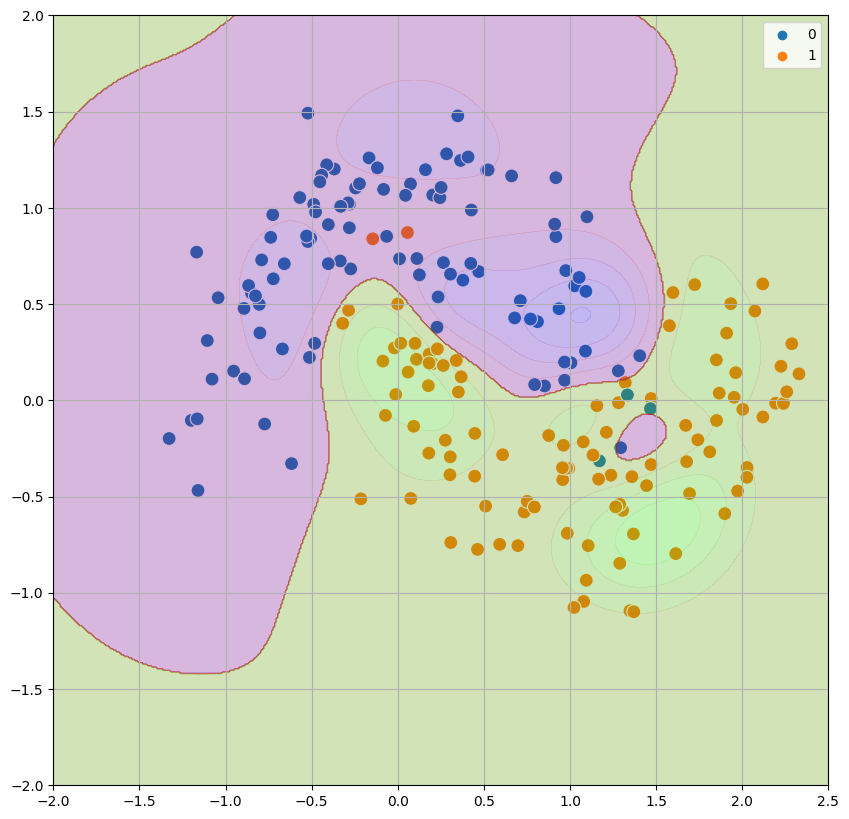

In [56]:
svm = SVC(kernel="rbf", gamma=5, C=100)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

$ k(x_1, x_2) = x_1*x_2 + x_1*x_1 + x_2*x_2 $

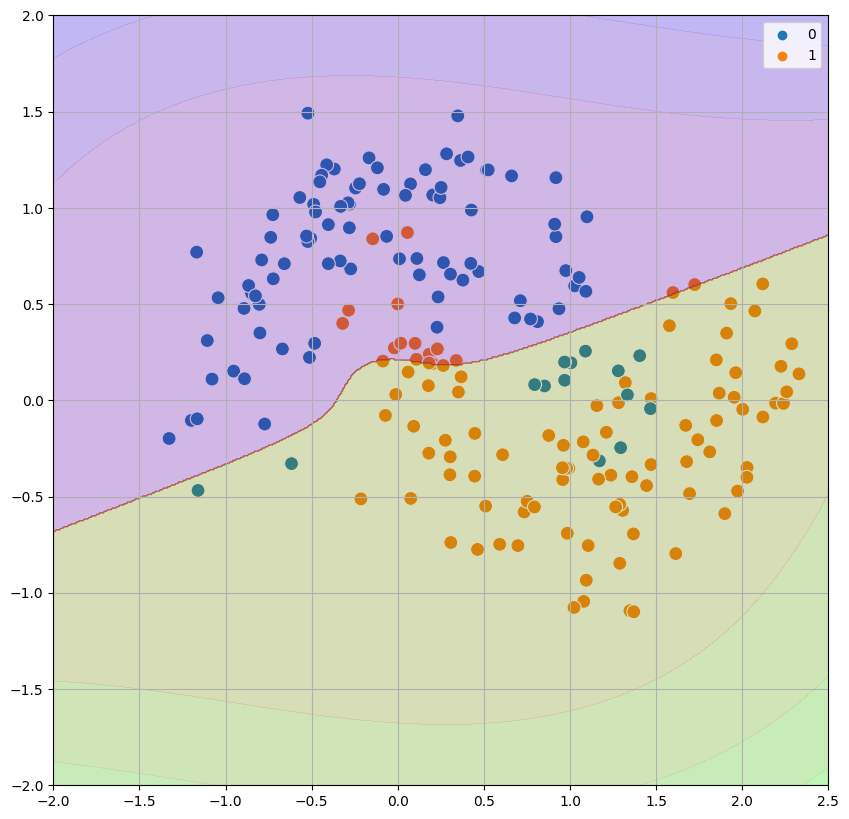

In [57]:
svm = SVC(kernel="poly",  degree=3, C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

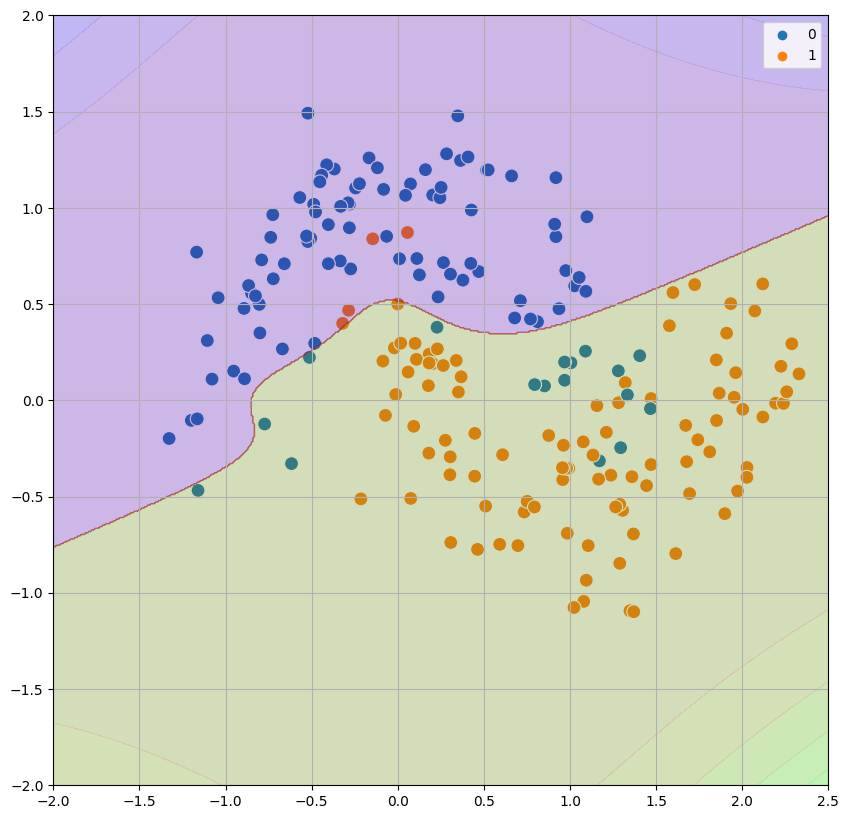

In [58]:
svm = SVC(kernel="poly",  degree=5, C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

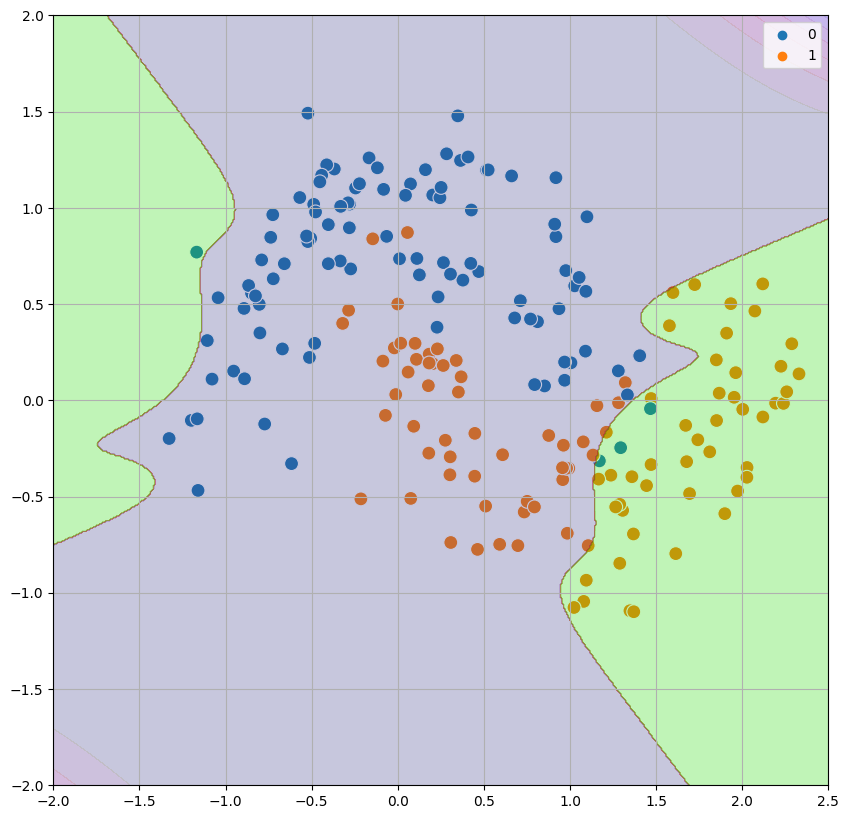

In [59]:
svm = SVC(kernel="poly",  degree=10, C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

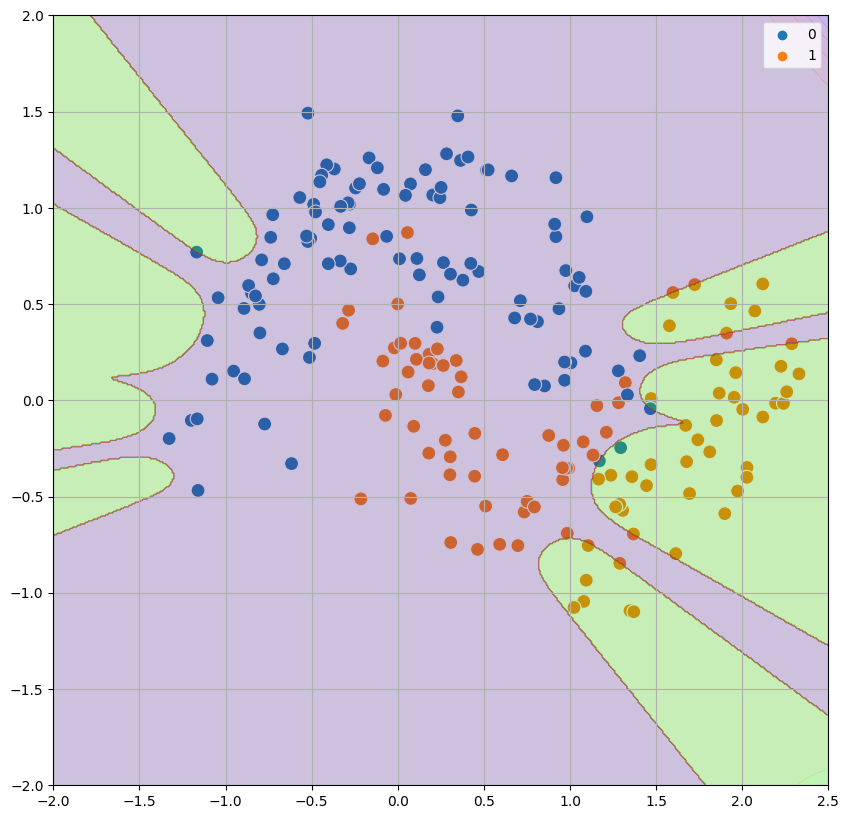

In [60]:
svm = SVC(kernel="poly",  degree=20, C=10)
svm.fit(X, Y)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, s=100)
plt.grid(True, which='both')
plot_predictions(svm, [-2, 2.5, -2, 2])
plt.show()

Используя построенные графики скажите, какая степень полинома дает лучшее решение?  

In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("ticks")

import wes
wes.set_palette('Darjeeling1')

import warnings
warnings.filterwarnings("ignore")

# Проклятие размерности
**При увеличении размерности** данных (т.е. добавлении новых признаков) **объем** пространства **увеличивается очень быстро** (экспоненциально).  

Из-за такого быстрого роста данные становятся редкими (sparse), в частности, уменьшается отношение расстояний до ближайшей точки и до наиболее далекой.  
Таким образом, получается, что при увеличении размерности **объекты становятся все более равноудаленными друг от друга**. 

<img src="http://www.visiondummy.com/wp-content/uploads/2014/04/curseofdimensionality.png" width=50%/>

Вот как это выглядит на сгенерированных данных:

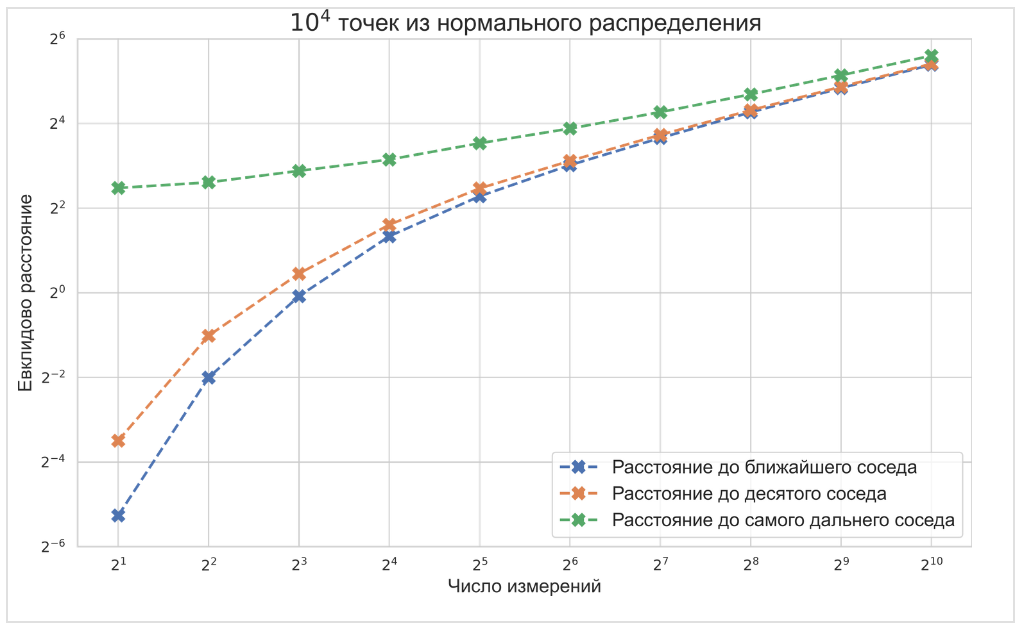

Однако **на реальных данных** все выглядит по-другому:

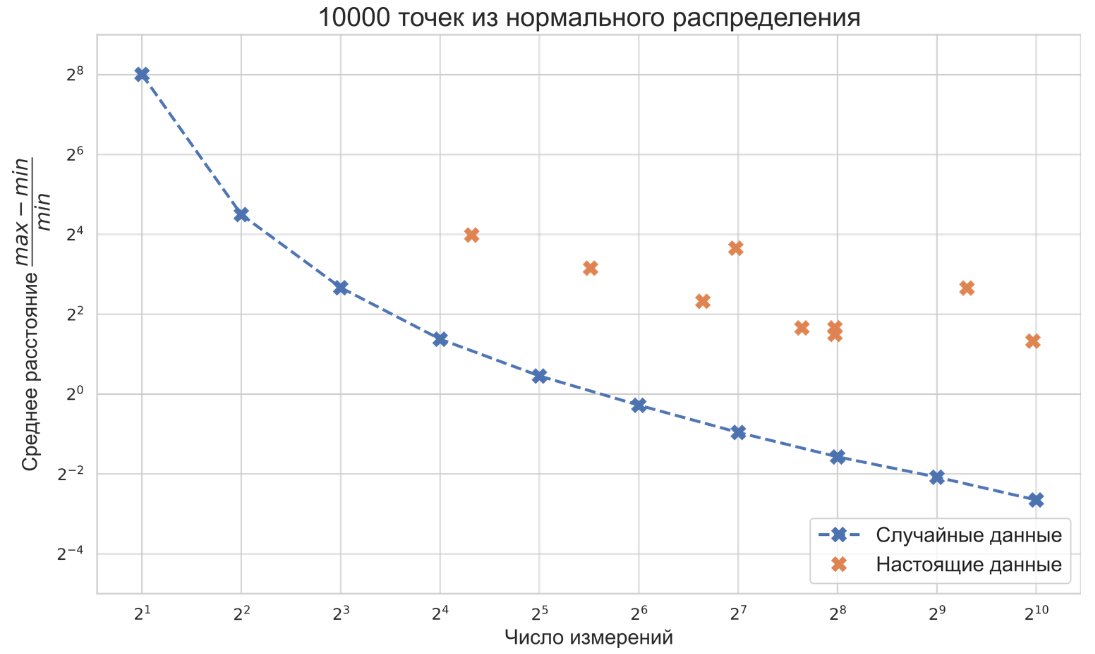

**Почему так происходит?**

Дело в том, что настоящие данные на самом деле располагаются в пространстве меньшей размерности, чем количество признаков.  

Причина этого достаточно проста: **признаки не являются полностью независимыми**. В результате, если нашими признаками являются, к примеру, рост и вес, то мы почти не будем наблюдать как людей с высоким ростом и очень низким весом, так и людей с низким ростом и очень высоким весом.

Таким образом, настоящие точки на самом деле обычно **находятся в пространстве меньшго размера**, чем точки с независимыми признаками.  

А можно ли считать, что эти точки **расположены в пространстве меньшей размерности**?  
Это предположение справедливо во многих случаях.

Снижение размерности помогает делать следующие вещи:
* **Визуализировать многомерные данные** на двумерных и трехмерных графиках
* Искать **внутренние закономерности** в данных
* **Сжимать** данные
* Бороться с **переобучением** (многие модели склонны к этому при большом количестве признаков)
* Создавать новые признаки
* И т.д.

## Методы снижения размерности

Сегодня мы рассмотрим **наиболее популярные** методы снижения размерности:
* PCA и kernel-PCA
* t-SNE
* UMAP

## PCA (principal component analysis)

Метод заключается в следующем: необходимо в пространстве данной размерности найти **линейное подпространство меньшей размерности**.

При этом подойдет не любое подпространство. Нужно, чтобы **точки, спроецированные на это подпространство** (гиперплоскость), **сохраняли максимальный объем информации**.

Как это работает? **Упростим задачу**, чтобы понять основной принцип.

![pca.gif](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/img/pca.gif)

### Попробуем визуализировать наши данные с помощью PCA

In [67]:
import sklearn.datasets
from sklearn.decomposition import PCA

In [68]:
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [69]:
X.shape

(569, 30)

In [70]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [71]:
X_pca.shape # из 30 размерностей в 2

(569, 2)

<Axes: xlabel='PC1', ylabel='PC2'>

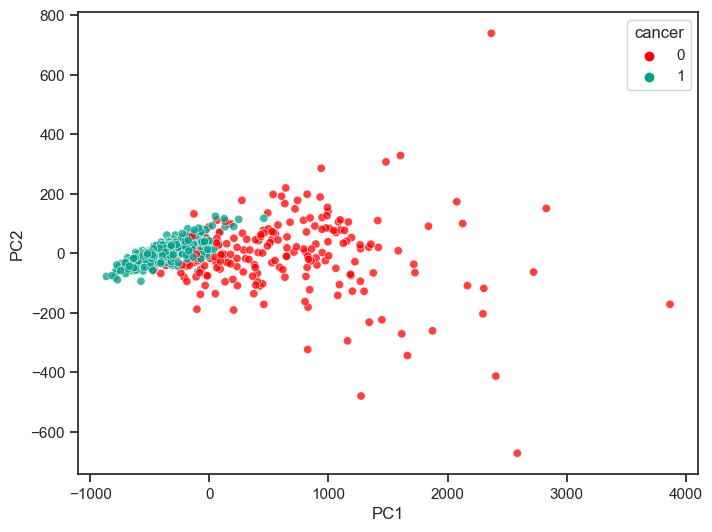

In [72]:
df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                   "cancer": y})

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", data=df, alpha=0.75)

**Для визуализации** данных обычно берут **2-3 компоненты**. А сколько компонент надо брать для других задач?

### Значимость главных компонент

Таким образом мы находим **линейное подпространство**, в котором предположительно находится **описываемое данными многообразие** (manifold). Как нам понять, какую размерность оно имеет?  

Чтобы это понять, нужно иметь определенную меру того, **насколько полезна каждая из добавляемых компонент**. Для этого существует понятие **объясненной дисперсии** (explained variance).

Очевидно, что **с помощью N компонент** (где N - число признаков) **можно описать весь массив данных** (т.е. 100% дисперсии).

**Как подобрать оптимальное число компонент?**

Один из способов: **задать определенную долю дисперсии**, которая должна быть объяснена компонентами.

In [73]:
n = np.min(X.shape)

In [74]:
pca = PCA(n_components=n)
X_pca = pca.fit_transform(X)

In [75]:
X_pca[1, :]

array([ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01,  1.78612832e+01,
       -4.33487404e+00, -2.25871776e-01, -4.60372215e-02,  2.00803920e-01,
       -4.85827948e-01, -8.40347188e-02,  8.06420067e-02,  3.30420791e-02,
        4.54854950e-02, -5.53381981e-03,  2.13681482e-02, -2.87149023e-02,
        1.23709237e-02, -6.00943232e-03,  1.67073824e-02,  2.08232414e-02,
        5.23669940e-03,  2.10690561e-02,  1.56462027e-03,  6.96754281e-03,
       -6.97814727e-03,  1.41102647e-03, -8.33646201e-05, -1.34685217e-03,
        6.85925212e-04, -1.06125086e-03])

In [76]:
X[1, :]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [77]:
pca.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

In [78]:
total_explained = np.cumsum(pca.explained_variance_ratio_)
total_explained.shape

(30,)

Оказывается, первые две компоненты в этом датасете объясняют более 99,7% дисперсии. Обычно это означает, что данные или **устроены очень просто**, или **не нормализованы**.

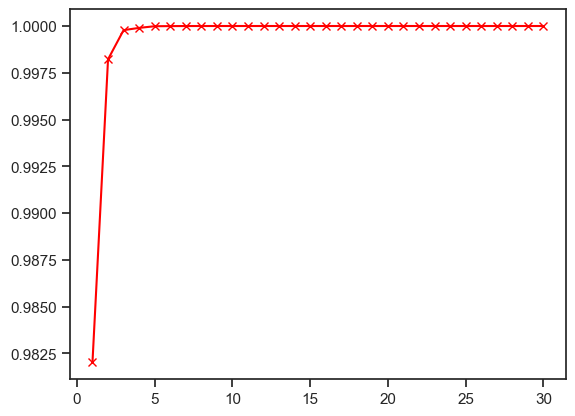

In [79]:
plt.plot(np.arange(1, n + 1), total_explained, "x-")
plt.show()

Оказывается, первые две компоненты в этом датасете объясняют более 99,7% дисперсии. Обычно это означает, что данные или **устроены очень просто**, или **не нормализованы**.

Попробуем нормализовать данные:

In [81]:
from sklearn.preprocessing import StandardScaler

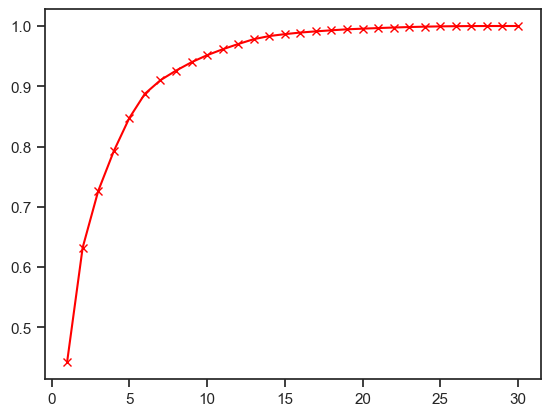

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=n)
X_pca = pca.fit_transform(X_scaled)

total_explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, n + 1), total_explained, "x-")
plt.show()

Теперь график выглядит более правдоподобно.

Попробуем выбрать **набор главных компонент, суммарно объясняющих 95% дисперсии**.

In [124]:
threshold = 0.95
top_n = np.argmax(total_explained >= threshold) + 1  # Finds first True
print(top_n)

10


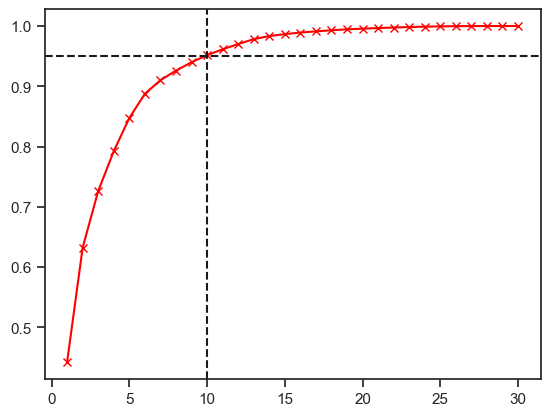

In [125]:
total_explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, n + 1), total_explained, "x-")
plt.axvline(x=top_n, color="k", ls="--")
plt.axhline(y=threshold, color="k", ls="--")
plt.show()

### Плюсы и минусы PCA

**PCA - очень простой линейный способ снижения размерности** ваших данных.  

**Плюсы**:
* Быстрые расчеты
* Надежность метода
* Простая интерпретация (линейный метод)  

**Минусы**:
* Плохо улавливает нелинейные зависимости в данных
* Возможна потеря "интересных" данных

**Как можно потерять важные данные при PCA?** Давайте сгенерируем пример:

In [83]:
from matplotlib.colors import LinearSegmentedColormap

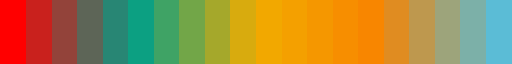

In [87]:
colors = wes_dict['Darjeeling1']
cmap_name = 'my_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=20)
cmap

In [88]:
plt.rcParams['image.cmap'] = 'rocket'

In [89]:
per_group = 500
arrays, labels = [], []
for group_id in range(5):
    x = np.random.normal(0, 10, per_group) + group_id
    y = np.random.normal(0, 10, per_group) + group_id
    z = np.random.normal(0, 0.1, per_group) + group_id
    group = np.array([x, y, z]).T
    arrays.append(group)
    
    group_labels = np.full(per_group, group_id)
    labels.append(group_labels)

In [90]:
data = pd.DataFrame(np.concatenate(arrays), columns=["X", "Y", "Z"])
data["label"] = pd.Series(np.concatenate(labels))
data.sample(3)

,X,Y,Z,label
2192,-6.140157,0.993030,4.010507,4
1186,3.842667,0.445042,1.849061,2
575,-9.282464,6.308530,1.037892,1


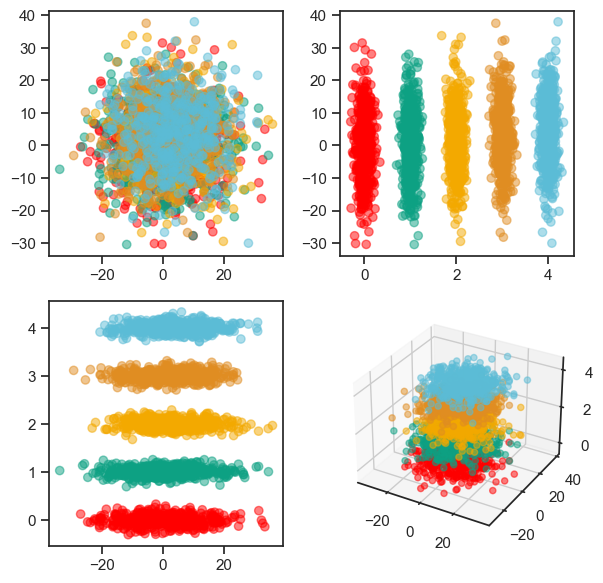

In [91]:
wes.set_palette('Darjeeling1')

fig = plt.figure(figsize=(6, 6))

for i, (c1, c2) in enumerate([("X", "Y"), ("Z", "Y"), ("X", "Z")], 1):
    ax = fig.add_subplot(2, 2, i)
    ax.scatter(data[c1], data[c2], c=data["label"], alpha=0.5, cmap=cmap)
    
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(data["X"], data["Y"], data["Z"], c=data["label"], alpha=0.5, cmap=cmap)
plt.tight_layout();
plt.show()

Посмотрим, что получилось на PCA:

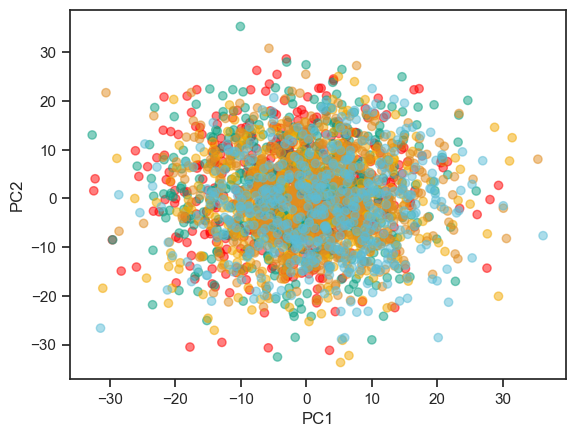

In [92]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data[["X", "Y", "Z"]])

plt.scatter(X_pca[:,0], X_pca[:,1], c=data["label"], alpha=0.5, cmap=cmap)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [93]:

pca = PCA(n_components=3)
X_pca = pca.fit_transform(data[["X", "Y", "Z"]])

In [95]:
np.cumsum(pca.explained_variance_ratio_)

array([0.50490321, 0.99056248, 1.        ])

Разбиение на группы полностью исчезло!  
Немного помогает исправить ситуацию **нормализация признаков**.

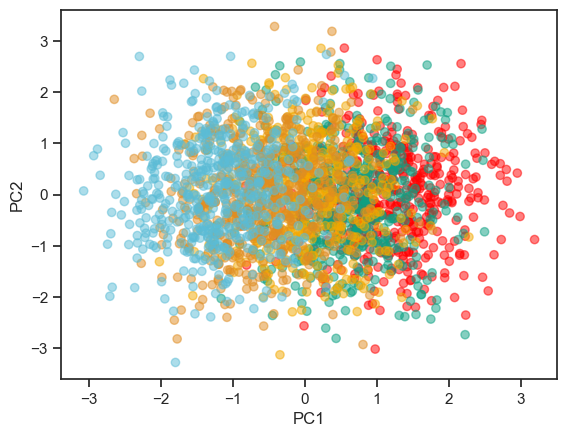

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[["X", "Y", "Z"]])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=data["label"], alpha=0.5, cmap=cmap)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### t-SNE

В этом методе мы пытаемся найти такое подпространство, в котором **учитываются в наибольшей степени расстояния между близкими объектами**.

**t-SNE** означает **t-distributed Stochastic Neighbour Embedding**.

* **t**-distributed -> используется распределение Стьюдента
* **S**tochastic -> использует вероятностные подходы
* **N**eighbor -> сохраняет дисперсию близких друг к другу точек
* **E**mbedding -> снижает размерность данных

Упрощенно говоря, t-SNE - это алгоритм, который генерирует **слегка отличающиеся** результаты при каждом запуске на тех же данных и преимущественно обеспечивает **сохранение локальной структуры точек**.

### Попробуем запустить t-SNE на тех же стандартизованных данных

In [96]:
import sklearn.datasets
from sklearn.manifold import TSNE

In [97]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[["X", "Y", "Z"]])

In [98]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=2500)
X_pca = tsne.fit_transform(X_scaled)

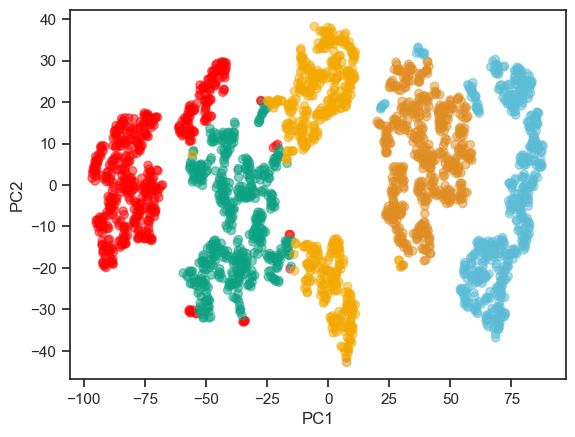

In [99]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=data["label"], alpha=0.5, cmap=cmap)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Классический пример 

In [100]:
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [107]:
tsne = TSNE(n_components=2, random_state=42, n_iter=1500)
X_tsne = tsne.fit_transform(X)

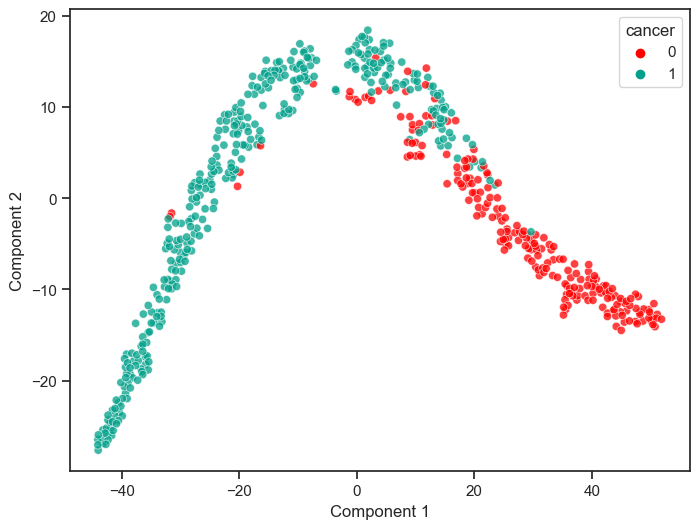

In [108]:
df = pd.DataFrame({"Component 1": X_tsne[:,0],
                   "Component 2": X_tsne[:,1],
                   "cancer": y})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Component 1", y="Component 2", hue="cancer", data=df, alpha=0.75, cmap=cmap)
plt.show()

### Гиперпараметры t-SNE

У алгоритма t-SNE есть **два ключевых гиперпараметра**, которые могут очень сильно влиять на результат:

* `n_iter` - количество итераций, которые производит алгоритм
* `perplexity` - нетривиальная вещь; упрощенно можно сказать, что это количество точек в окрестности, которые учитываются алгоритмом t-SNE

Попробуем посмотреть, как эти параметры влияют на визуализацию данных!

Perplexity **рекомендуют выбирать в диапазоне 5 - 50**. Она не обязательно должна быть целой.

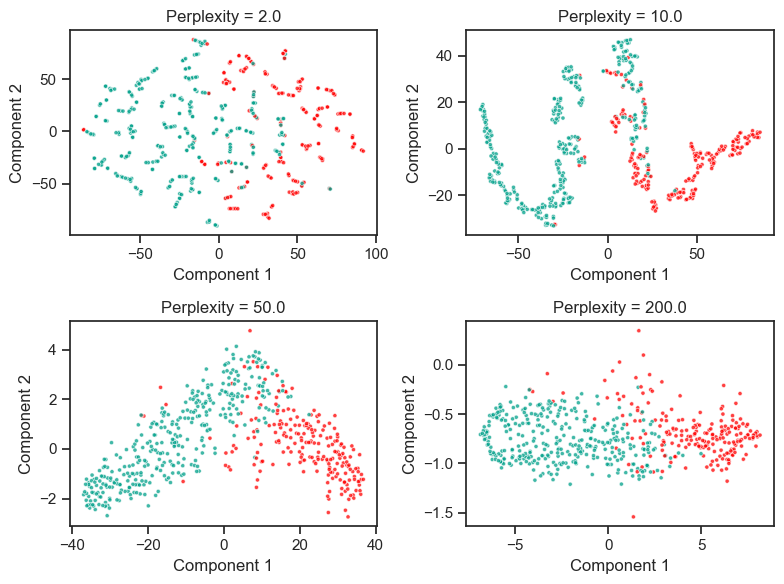

In [62]:
plt.figure(figsize=(8, 6))
for i, perp in enumerate([2.0, 10.0, 50.0, 200.0], 1):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perp)
    X_tsne = tsne.fit_transform(X)
    df_s = pd.DataFrame({"Component 1": X_tsne[:,0], "Component 2": X_tsne[:,1], "cancer": y})
    
    plt.subplot(2, 2, i)
    sns.scatterplot(x="Component 1", y="Component 2", hue="cancer", data=df_s,
                    marker=".", alpha=0.75, legend=False, cmap=cmap)
    plt.title(f"Perplexity = {perp}")
plt.tight_layout()

Количество итераций обычно **чем больше, тем лучше, но дольше**.

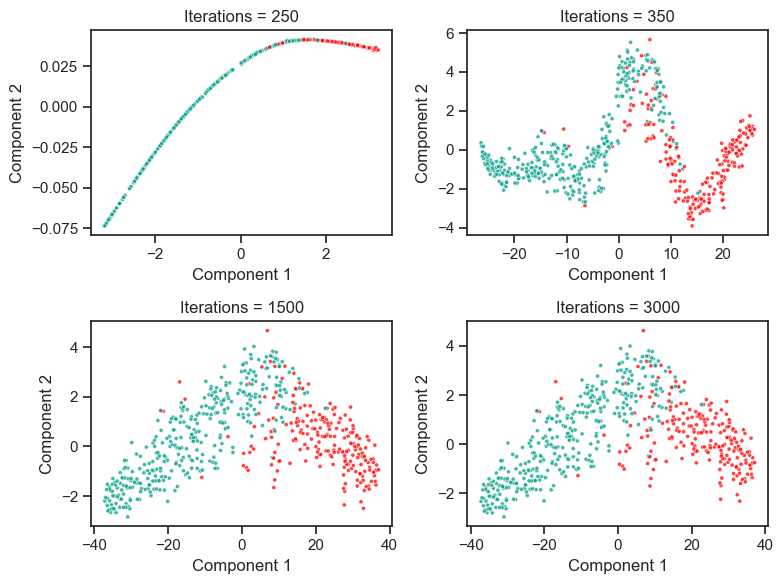

In [63]:
plt.figure(figsize=(8, 6))
for i, n_iter in enumerate([250, 350, 1500, 3000], 1):
    tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=n_iter)
    X_tsne = tsne.fit_transform(X)
    df_s = pd.DataFrame({"Component 1": X_tsne[:,0], "Component 2": X_tsne[:,1], "cancer": y})
    
    plt.subplot(2, 2, i)
    sns.scatterplot(x="Component 1", y="Component 2", hue="cancer", data=df_s,
                    marker=".", alpha=0.75, legend=False, cmap=cmap)
    plt.title(f"Iterations = {n_iter}")
plt.tight_layout()

**Краткие выводы**:

* Чем больше мы совершаем итераций (`n_iters`), тем лучше.
  * Следует соблюдать баланс между тем, что при увеличении `n_iters` растет не только качество, но и время работы алгоритма.
* `perplexity` - очень хитрый параметр.
  * `perplexity` очень сильно влияет на то, какую форму будет иметь манифолд при отображении.
  * Слишком низкие и слишком высокие значения `perplexity` могут давать артефакты: "кластеры видны, когда их нет" и "кластеры не видны, когда они есть".

Следует **очень аккуратно интерпретировать результаты t-SNE**, особенно выделенные алгоритом кластеры.

### Плюсы и минусы t-SNE

**Плюсы**:
* Способен выделять произвольные нелинейные зависимости
* Учитывается локальная топология точек
* Стохастический алгоритм -> возможно оценить стабильность "кластеров"

**Минусы**:
* Медленное обучение на больших объемах данных
* Получаемое пространство почти не интерпретируемо
* Множественные артефакты и искажения топологии
  * Для снижения их количества важно понимание гиперпараетров
* Слабо учитывается глобальная топология точек
* Стохастический алгоритм -> подвержен шуму

### UMAP

По своей сути **UMAP очень сильно похож на t-SNE**. Алгоритм так же обеспечивает **сохранение локальной структуры данных в ущерб глобальной**.

Чтобы пользоваться UMAP, нужно **установить пакет `umap-learn`** из PyPi.

In [64]:
!pip install umap-learn --user

### Попробуем визуализировать наши данные с помощью UMAP

In [65]:
!pip install numba

In [66]:
import sklearn.datasets
from umap import UMAP

In [67]:
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [68]:
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)

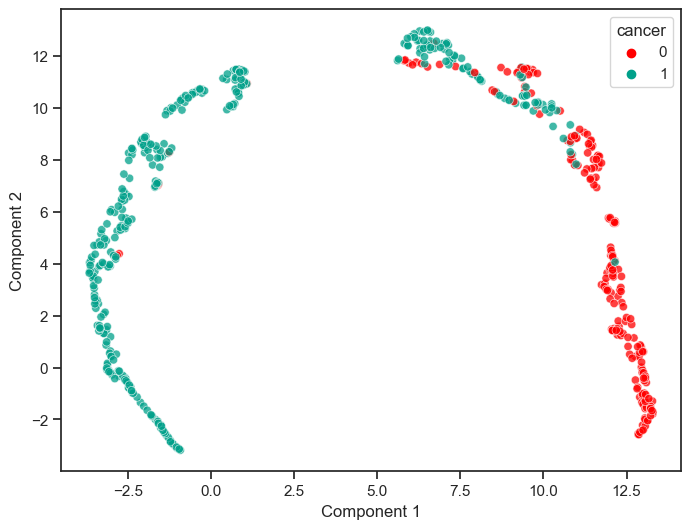

In [69]:
df = pd.DataFrame({"Component 1": X_umap[:,0],
                   "Component 2": X_umap[:,1],
                   "cancer": y})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Component 1", y="Component 2", hue="cancer", data=df, alpha=0.75,cmap=cmap)
plt.show()

У алгоритма UMAP тоже есть **два ключевых гиперпараметра**, которые могут очень сильно влиять на результат:

* `min_dist` - насколько близко соседние точки могут находиться в эмбеддинге
* `n_neighbors` - упрощенно: примерное количество точек в окрестности, которые учитываются алгоритмом

Попробуем посмотреть, как эти параметры влияют на визуализацию данных!

`n_neighbors` рекомендуют выбирать... тоже **в диапазоне 5 - 50**! Правда, это уже целое число.

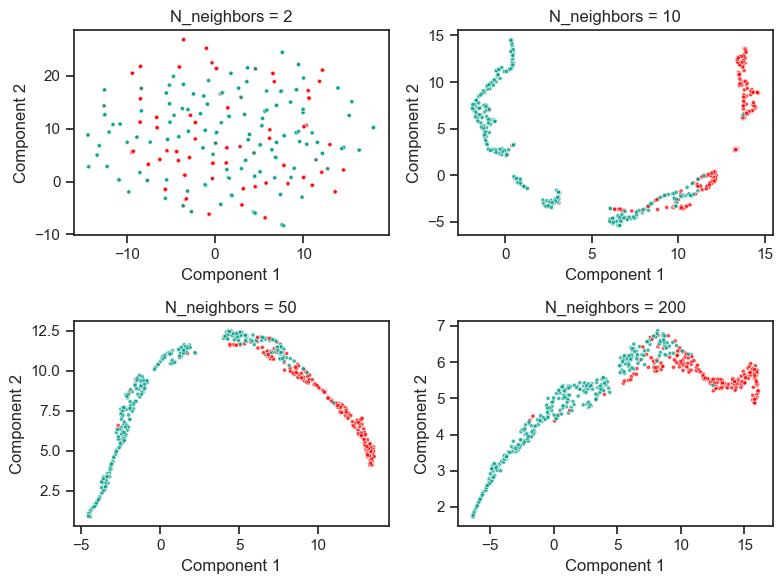

In [70]:
plt.figure(figsize=(8, 6))
for i, n_nei in enumerate([2, 10, 50, 200], 1):
    umap = UMAP(n_components=2, random_state=42, n_neighbors=n_nei)
    X_umap = umap.fit_transform(X)
    df_s = pd.DataFrame({"Component 1": X_umap[:,0], "Component 2": X_umap[:,1], "cancer": y})
    
    plt.subplot(2, 2, i)
    sns.scatterplot(x="Component 1", y="Component 2", hue="cancer", data=df_s,
                    marker=".", alpha=0.75, legend=False,cmap=cmap)
    plt.title(f"N_neighbors = {n_nei}")
plt.tight_layout()

`min_dist` обычно берут **в диапазоне от 0.001 до 0.5**.

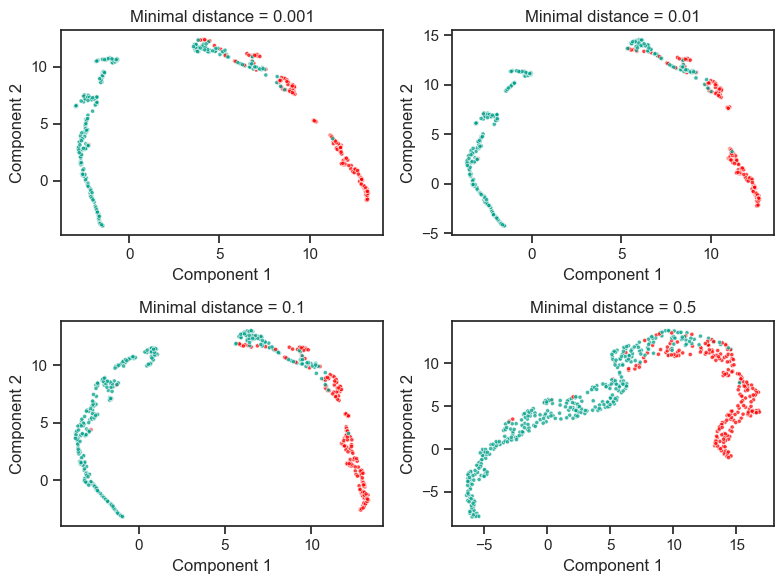

In [71]:
plt.figure(figsize=(8, 6))
for i, dist in enumerate([0.001, 0.01, 0.1, 0.5], 1):
    umap = UMAP(n_components=2, random_state=42, min_dist=dist)
    X_umap = umap.fit_transform(X)
    df_s = pd.DataFrame({"Component 1": X_umap[:,0], "Component 2": X_umap[:,1], "cancer": y})
    
    plt.subplot(2, 2, i)
    sns.scatterplot(x="Component 1", y="Component 2", hue="cancer", data=df_s,
                    marker=".", alpha=0.75, legend=False,cmap=cmap)
    plt.title(f"Minimal distance = {dist}")
plt.tight_layout()

**Краткие выводы**:

* Чем больше значение (`min_dist`), тем больше смещается акцент с локальной структуры на глобальную.
  * Это помогает соблюсти баланс для отображения максимально полной структуры на одном графике.
* `n_neighbors` - параметр, определяющий количество соседей у узлов в графе.
  * Так же, как и `min_dist`, помогает поддерживать баланс акцента на локальной/глобальной структуре.
  * Более высокие значения смещают общее отображение к глобальной топологии данных.
  * Недостаточно выскоие значения могут породить "кластеры".

Как и в случае с t-SNE, нужно **аккуратно интерпретировать результаты UMAP**, особенно выделенные алгоритом кластеры.

**Плюсы**:
* Способен выделять произвольные нелинейные зависимости
* Стохастический алгоритм -> возможно оценить стабильность "кластеров"
* **Намного быстрее t-SNE!**
* **Более гибкая настрока баланса между локальной и глобальной топологией**

**Минусы**:
* **Предполагает связную структуру многообразия (manifold)**
* Медленное обучение на больших объемах данных
* Получаемое пространство почти не интерпретируемо
* Есть некоторые артефакты и искажения топологии
  * Для снижения их количества важно понимание гиперпараметров

## tSNE vs UMAP

* Два похожих метода - **t-SNE** и **UMAP** - используются для поиска нелинейного многообразия в данных.

* Для корректного использования **t-SNE** и **UMAP** нужно четкое понимание их параметризации:
  * Для t-SNE важен параметр **перплексии**: он определяет количество рассматриваемый соседей при эмбеддинге.
  * Для UMAP важны параметры **числа соседей** в графе и **минимального расстояния** в эмбеддинге. Они позволяют менять баланс отображения локальной/глобальной топологии.